In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('Aerator ML.xlsx')

In [184]:
df1=pd.read_excel('Aerator ML.xlsx')

In [4]:
df

,Day,Time,Surface DO,Bottom DO,Surface Temperature,Bottom Temperature
0,Day 1,06:00:00,5.4,5.0,29.1,25.0
1,Day 1,07:00:00,6.2,5.0,29.0,25.5
2,Day 1,08:00:00,6.9,5.2,31.0,26.0
3,Day 1,09:00:00,6.8,5.3,31.2,26.0
4,Day 1,10:00:00,6.7,5.3,31.4,26.3
...,...,...,...,...,...,...
91,Day 4,01:00:00,6.4,5.9,30.1,28.1
92,Day 4,02:00:00,6.5,5.7,30.1,28.0
93,Day 4,03:00:00,6.4,5.8,29.5,28.3
94,Day 4,04:00:00,6.6,5.8,29.2,28.2


In [7]:
df['Bottom DO']

0     5.0
1     5.0
2     5.2
3     5.3
4     5.3
     ... 
91    5.9
92    5.7
93    5.8
94    5.8
95    5.9
Name: Bottom DO, Length: 96, dtype: float64

In [8]:
df.head()

,Day,Time,Surface DO,Bottom DO,Surface Temperature,Bottom Temperature
0,Day 1,06:00:00,5.4,5.0,29.1,25.0
1,Day 1,07:00:00,6.2,5.0,29.0,25.5
2,Day 1,08:00:00,6.9,5.2,31.0,26.0
3,Day 1,09:00:00,6.8,5.3,31.2,26.0
4,Day 1,10:00:00,6.7,5.3,31.4,26.3


In [9]:
df.describe()

,Surface DO,Bottom DO,Surface Temperature,Bottom Temperature
count,96.000000,96.000000,96.000000,96.000000
mean,6.464583,5.725000,31.417708,28.576042
std,0.429438,0.420776,1.458622,1.363026
min,5.200000,4.900000,29.000000,25.000000
25%,6.200000,5.400000,30.200000,28.000000
50%,6.500000,5.700000,31.100000,28.800000
75%,6.800000,6.100000,32.325000,29.825000
max,7.300000,6.700000,34.200000,30.200000


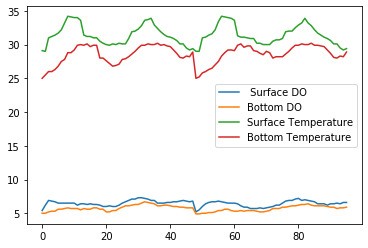

In [11]:
df.plot()

In [167]:
#Gaussian Distribution check
from scipy.stats import shapiro
stat, p = shapiro(df['Bottom DO'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.980, p=0.158
Probably Gaussian


In [200]:
# Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df['Surface Temperature']
data2 = df['Bottom Temperature']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.469, p=0.000
Probably dependent


In [186]:
df1.drop('Day', axis=1, inplace=True)

In [187]:
df1.drop('Time', axis=1, inplace=True)

In [193]:
df2=df1.iloc[:,0:2]

In [194]:
df2

,Surface DO,Bottom DO
0,5.4,5.0
1,6.2,5.0
2,6.9,5.2
3,6.8,5.3
4,6.7,5.3
...,...,...
91,6.4,5.9
92,6.5,5.7
93,6.4,5.8
94,6.6,5.8


In [196]:
# Chi-Squared Test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(df2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.881, p=1.000
Probably independent


In [197]:
# Student's t-test
from scipy.stats import ttest_ind
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=13.947, p=0.000
Probably different distributions


In [198]:
# Example of the Paired Student's t-test
from scipy.stats import ttest_rel
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=19.114, p=0.000
Probably different distributions


In [199]:
# Analysis of Variance Test
from scipy.stats import f_oneway
stat, p = f_oneway(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=194.511, p=0.000
Probably different distributions


In [13]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [14]:
test_result_1 =adfuller(df['Bottom DO'])

In [17]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(BottomDO):
    result=adfuller(BottomDO)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adfuller_test(df['Bottom DO'])

ADF Test Statistic : -2.2372156443456697
p-value : 0.1930165618232511
#Lags Used : 0
Number of Observations Used : 95
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [99]:
df['Bottom DO First Difference'] = df['Bottom DO'] - df['Bottom DO'].shift(6)

In [100]:
df['Bottom DO'].shift(6)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
91    6.1
92    6.1
93    6.1
94    6.1
95    6.0
Name: Bottom DO, Length: 96, dtype: float64

In [101]:
df

,Day,Time,Surface DO,Bottom DO,Surface Temperature,Bottom Temperature,Bottom DO First Difference,forecast,forecast Bottom DO
0,Day 1,06:00:00,5.4,5.0,29.1,25.0,NaN,NaN,NaN
1,Day 1,07:00:00,6.2,5.0,29.0,25.5,NaN,NaN,NaN
2,Day 1,08:00:00,6.9,5.2,31.0,26.0,NaN,NaN,NaN
3,Day 1,09:00:00,6.8,5.3,31.2,26.0,NaN,NaN,NaN
4,Day 1,10:00:00,6.7,5.3,31.4,26.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
91,Day 4,01:00:00,6.4,5.9,30.1,28.1,-0.2,0.002735,5.810454
92,Day 4,02:00:00,6.5,5.7,30.1,28.0,-0.4,0.005840,5.796659
93,Day 4,03:00:00,6.4,5.8,29.5,28.3,-0.3,0.007608,5.694669
94,Day 4,04:00:00,6.6,5.8,29.2,28.2,-0.3,0.008614,5.703751


In [102]:
## Again test dickey fuller test
adfuller_test(df['Bottom DO First Difference'].dropna())

ADF Test Statistic : -3.1836470443927536
p-value : 0.020950981077732675
#Lags Used : 8
Number of Observations Used : 81
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


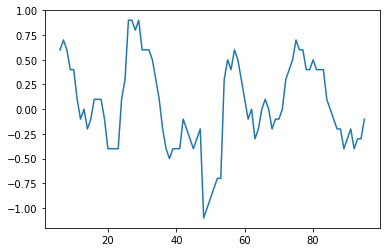

In [103]:
df['Bottom DO First Difference'].plot()

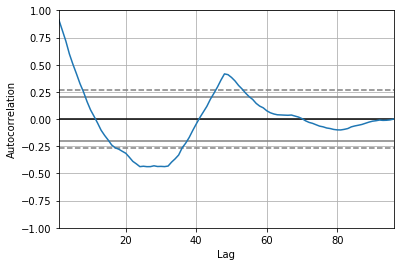

In [104]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Bottom DO'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


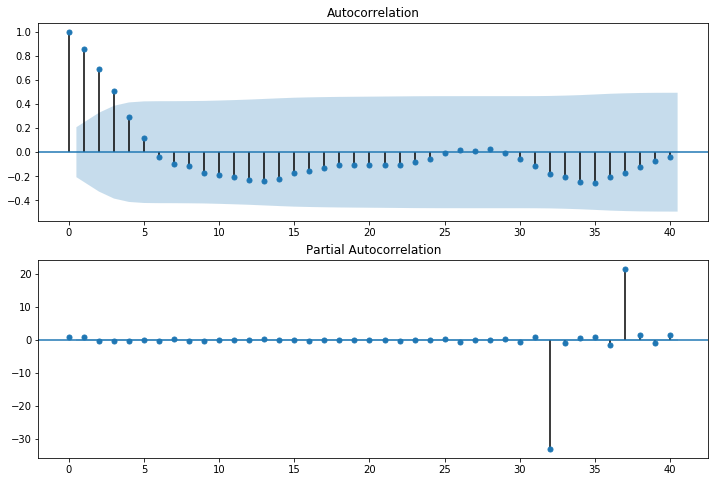

In [111]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Bottom DO First Difference'].iloc[7:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Bottom DO First Difference'].iloc[7:],lags=40,ax=ax2)

In [133]:
# For non-seasonal data
#p=0, d=1, q= 4
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(df['Bottom DO'],order=(0,1,4))
model_fit=model.fit()

In [134]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Bottom DO   No. Observations:                   95
Model:                 ARIMA(0, 1, 4)   Log Likelihood                  45.247
Method:                       css-mle   S.D. of innovations              0.150
Date:                Wed, 02 Sep 2020   AIC                            -78.493
Time:                        22:19:59   BIC                            -63.170
Sample:                             1   HQIC                           -72.302
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0104      0.019      0.548      0.584      -0.027       0.048
ma.L1.D.Bottom DO     0.1136      0.103      1.107      0.268      -0.088       0.315
ma.L2.D.Bottom DO     0.0716      0.101      0.711      0.477      -0.126       0.269
ma.L3.D.Bottom DO     0.1878      0.102      1.834      0.067      -0.013       0.389
ma.L4.D.Bottom DO    -0.1404      0.093     -1.509      0.131      -0.323       0.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3705           -0.0000j            1.3705           -0.5000
MA.2            0.2046           -1.4895j            1.5034           -0.2283
MA.3            0.2046           +1.4895j            1.5034            0.2283
MA.4            2.2987           -0.0000j            2.2987           -0.0000
-----------------------------------------------------------------------------
"""

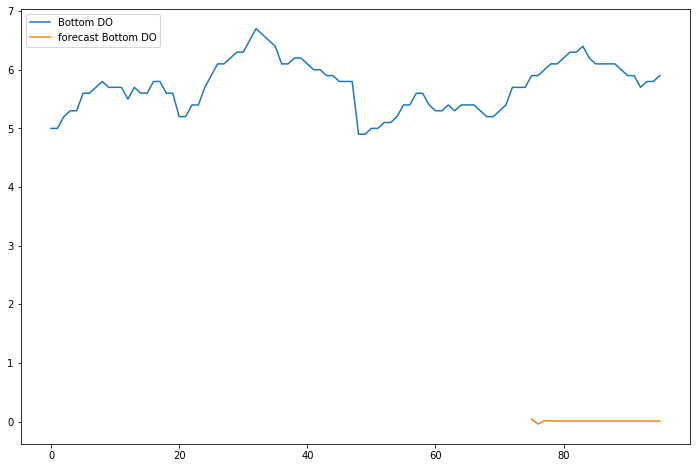

In [136]:
df['forecast Bottom DO']=model_fit.predict(start=75,end=103,dynamic=True)
df[['Bottom DO','forecast Bottom DO']].plot(figsize=(12,8))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


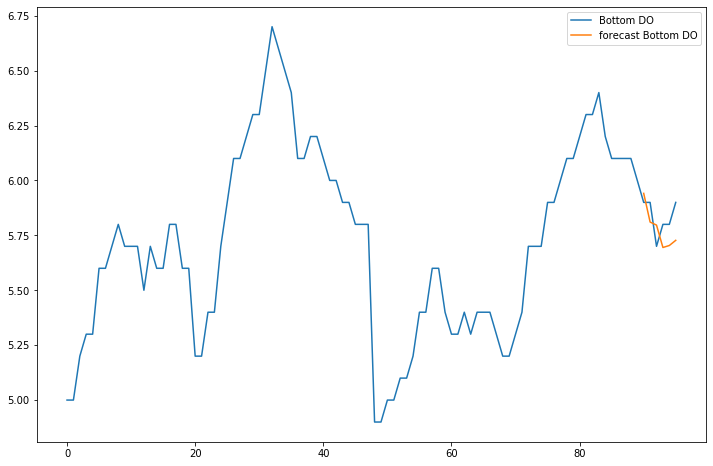

In [146]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Bottom DO'],order=(1, 1, 1),seasonal_order=(1,1,1,48))
results=model.fit()
df['forecast Bottom DO']=results.predict(start=90,end=103,dynamic=True)
df[['Bottom DO','forecast Bottom DO']].plot(figsize=(12,8))

In [157]:
future_df=pd.DataFrame(index=np.arange(97,200,1) ,columns=df.columns)

In [158]:
future_df=pd.concat([df,future_df])

In [159]:
future_df

,Day,Time,Surface DO,Bottom DO,Surface Temperature,Bottom Temperature,Bottom DO First Difference,forecast,forecast Bottom DO
0,Day 1,06:00:00,5.4,5.0,29.1,25.0,NaN,NaN,NaN
1,Day 1,07:00:00,6.2,5.0,29.0,25.5,NaN,NaN,NaN
2,Day 1,08:00:00,6.9,5.2,31.0,26.0,NaN,NaN,NaN
3,Day 1,09:00:00,6.8,5.3,31.2,26.0,NaN,NaN,NaN
4,Day 1,10:00:00,6.7,5.3,31.4,26.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


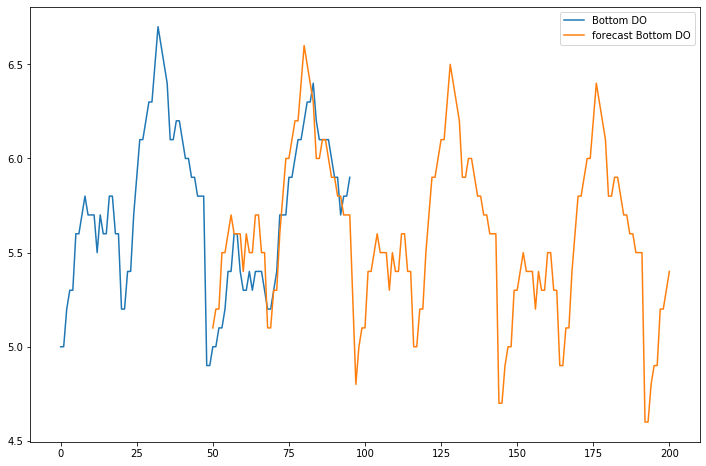

In [156]:
future_df['forecast Bottom DO'] = results.predict(start = 50, end = 200, dynamic= True)  
future_df[['Bottom DO', 'forecast Bottom DO']].plot(figsize=(12, 8))